# **EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: PROJETO PREVISÃO DE DOENÇA CARDÍACA**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais de referência. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [3]:
import numpy as np
import pandas as pd

In [5]:
dados = pd.read_csv('./content/heart.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## **Exploração dos Dados**

In [6]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [8]:
dados.shape

(918, 12)

## **Análise das Variáveis (Atributos)**

### **Age = idade**

In [9]:
dados['Age'].value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
40    13
69    13
66    13
37    11
35    11
68    10
74     7
70     7
34     7
36     6
32     5
71     5
72     4
75     3
29     3
31     2
33     2
77     2
76     2
30     1
28     1
73     1
Name: count, dtype: int64

In [10]:
dados['Age'].value_counts().sort_index()

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

In [11]:
import plotly.express as px

In [16]:
hist1 =  px.histogram (dados,  x = "Age", nbins=60) 
hist1.update_layout(width=800,height=500,title_text='Distribuição das idades') 
hist1.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import seaborn as sns

In [ ]:
sns.histplot(dados, x='Age', bins=30, color="orange", kde=True, stat="count");

### **Sex = sexo**

In [ ]:
dados['Sex'].value_counts()

In [ ]:
sns.countplot(x='Sex', data=dados);

### **Chest Pain Type = tipo de dor no peito**

In [ ]:
dados['ChestPainType'].value_counts()

ASY: assintomático.

NAP: dor não anginosa.

ATA: angina atípica.

TA: angina típica.







### **Resting BP (blood pressure) = pressão sanguínea em repouso em mmHg(sistólica)**

In [ ]:
dados.RestingBP.value_counts().sort_index()

In [ ]:
sns.histplot(dados, x='RestingBP', bins=30, color="orange", kde=True, stat="count");

### **Cholesterol = colesterol sérico (mg/dl)**

In [ ]:
dados.Cholesterol.value_counts().sort_index()

In [ ]:
sns.histplot(dados, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)**

In [ ]:
dados.FastingBS.value_counts()

0: Fasting BS < 120 mg/dl (não diabético)

1: Fasting BS >= 120 mg/dl, (diabético)

In [ ]:
sns.countplot(x='FastingBS', data=dados);

### **Resting ECG = eletrocardiograma em repouso**

In [ ]:
dados.RestingECG.value_counts()

Normal: Normal

LVH: Hipertrofia ventricular esquerda

ST: Anormalidade da onda ST-T

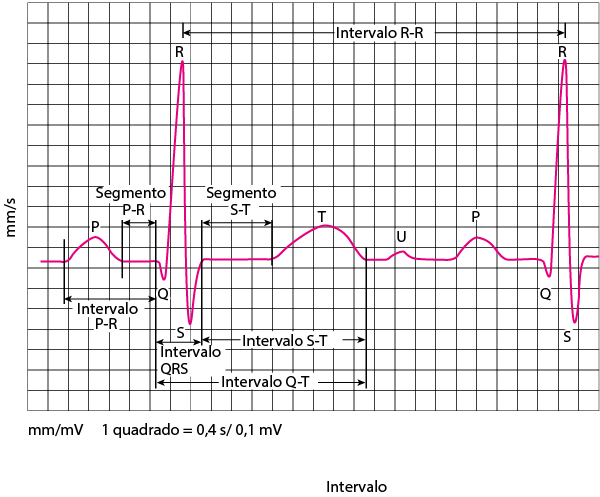

**SEGMENTO ST:** Qualquer desnível do
segmento ST, para cima (supradesnível) ou para baixo
(infradesnível), deve ser avaliado pois pode corresponder a um
infarto agudo do miocárdio.

In [ ]:
sns.countplot(x='RestingECG', data=dados);

### **Max HR (heart rate) = frequência cardíaca máxima**

In [ ]:
dados['MaxHR'].value_counts()

In [ ]:
sns.histplot(dados, x='MaxHR', bins=30, color="orange", kde=True, stat="count");

### **Exercise Angina = Angina induzida por exercício**

In [ ]:
dados['ExerciseAngina'].value_counts()

In [ ]:
px.pie(dados, 'ExerciseAngina') 

### **Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso**

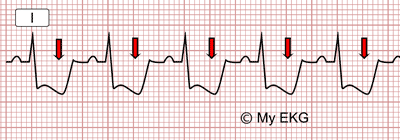

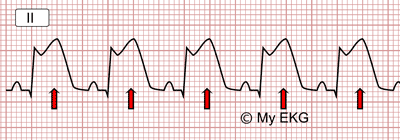

In [ ]:
dados['Oldpeak'].value_counts()

In [ ]:
sns.histplot(dados, x='Oldpeak', bins=30, color="orange", kde=True, stat="count");

### **ST_Slope = Inclinação do segmento ST no ECG**

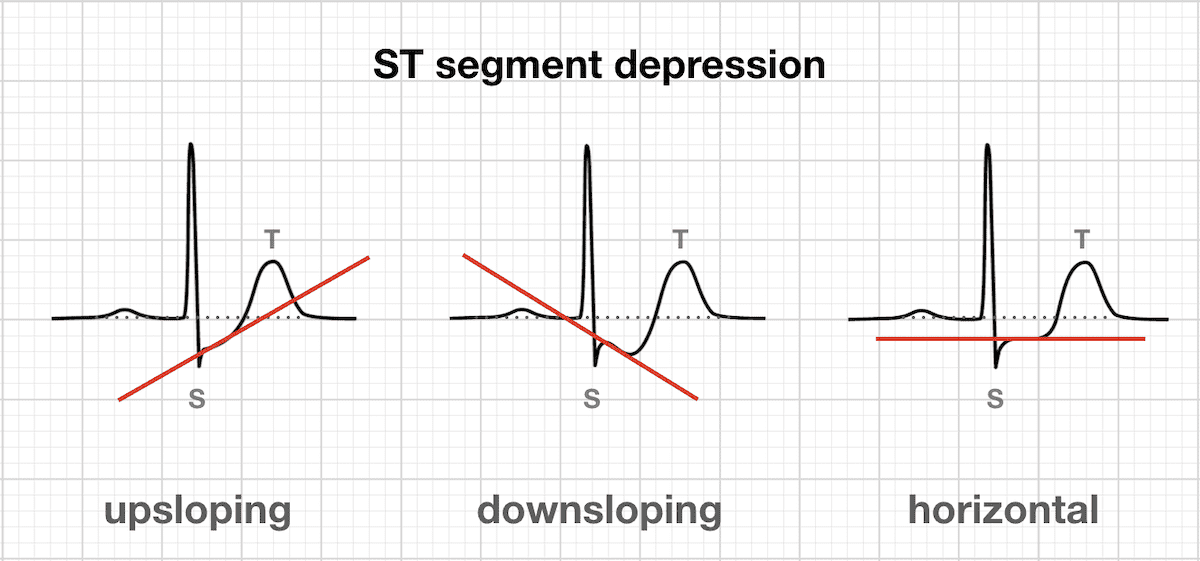

In [ ]:
dados['ST_Slope'].value_counts()

Flat = plano

Up = para cima

Down = para baixo 

In [ ]:
px.pie(dados, 'ST_Slope') 

### **Heart Disease = Doença cardíaca**

In [ ]:
dados['HeartDisease'].value_counts()

0 = Não possui doença cardíaca

1 = Possui doença cardíaca



In [ ]:
px.pie(dados, 'HeartDisease')

## **Análise dos tipos de atributos.**

In [ ]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
dados.dtypes

## **Valores Missing (NAN)**

In [ ]:
# RELAÇÃO DA QUANTIDADE
dados.isnull().sum()

In [ ]:
# EXCLUIR VALORES MISSING
dados2 = dados.dropna()

In [ ]:
dados2.shape

In [ ]:
dados2.isnull().sum()

In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2['Age'].fillna(dados2['Age'].mean(), inplace=True)

In [ ]:
# SUBSTITUIR OS VALORES MISSING POR QUALQUER OUTRO VALOR
dados2['Age'].fillna(10, inplace=True)

## **Análises Estatísticas Descritivas**

In [ ]:
dados.describe()

In [ ]:
dados.mode()

### **Tratando Valores Incoerentes**

**Excluindo registro com pressão zero**

In [ ]:
dados2 = dados.loc[dados.RestingBP != 0] 

In [ ]:
dados2.shape

In [ ]:
dados2.describe()

**Substituindo valores zeros do Colesterol pela média sem os zeros**

In [ ]:
dados2.Cholesterol.mean()

In [ ]:
dados2.Cholesterol.replace(0, np.NaN, inplace=True)

In [ ]:
dados2.isnull().sum()

In [ ]:
dados2.Cholesterol.mean()

In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2['Cholesterol'].fillna(dados2['Cholesterol'].mean(), inplace=True)

In [ ]:
dados2.isnull().sum()

In [ ]:
dados2.describe()

In [ ]:
dados2.mode()

In [ ]:
sns.histplot(dados2, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Análise de Outliers**

In [ ]:
# Idade
px.box(dados2, y='Age')

In [ ]:
# Pressão Sanguínea em Repouso
px.box(dados2, y='RestingBP')

In [ ]:
# Colesterol
px.box(dados2, y='Cholesterol')

In [ ]:
# Frequência Cardíaca Máxima
px.box(dados2, y='MaxHR')

## **Salvando (Exportando) o Dataframe Tratado**

In [ ]:
dados2.to_csv('heart_tratado.csv', sep=';', encoding='utf-8', index = False)